# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os, gdown
import zipfile, time

# **Download CIC-IDS2017 Dataset**

In [2]:
def download_file_from_google_drive(file_id, destination):
    """
    Input: file_id (Obtained from google drive), destionation (For saving the file)
    Output: _ (Download the file in destination directory)
    """
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, destination, quiet=True)


def unzip_dataset(extraction_dir):

  """
  Input: Extraction_dir (Direction of dataset to unzip into)
  Output: _ (Exract the zip file in the given direction)
  """

  # Ensure the extraction directory exists
  os.makedirs(extraction_dir, exist_ok=True)

  # Unzip the file
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extraction_dir)




current_working_dir = os.getcwd()
destination = current_working_dir
zip_file_path = os.path.join(destination, 'dataset.zip')
file_id =  '1a7z1lGFg-shaBUTfmPewFAebCc8FDhx5' # File Id
extraction_dir = os.path.join(destination,'dataset/')

# call functions
download_file_from_google_drive(file_id, zip_file_path)
unzip_dataset(extraction_dir)

# **Esploratory Data Analysis**

## Load datasets
On this [link](https://www.unb.ca/cic/datasets/ids-2017.html), You can access to all information about dataset.

In [3]:
# Let's start by Friday day at this note book.
Friday_Morning_pcap_df = pd.read_csv('/content/dataset/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
display(Friday_Morning_pcap_df)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [4]:
# Let's look at its shape
print(f'No of rows (instances): {Friday_Morning_pcap_df.shape[0]}. \nNo of columns (features + Label): {Friday_Morning_pcap_df.shape[1]}')

No of rows (instances): 191033. 
No of columns (features + Label): 79


unique_lables: ['BENIGN' 'Bot']
There are [189067] and [1966] traffic flows for normal and attack behaviours, respectively.
So, as we see there are two types of traffic: [BENGINE] --> denotes for Normal Traffic and [Bot]-->Denotes for Botent Attack 
As you can the number of anomalies is very small in comparision to Normal points
****************************************************************************************************


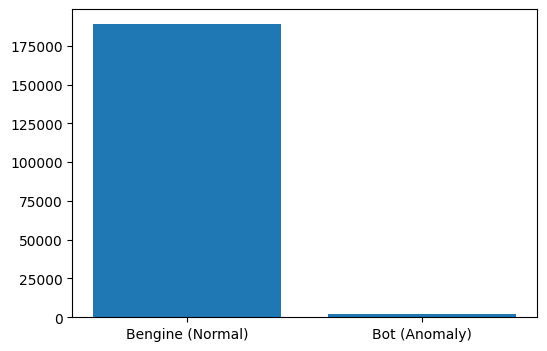

In [5]:
# Let's look at the type of traffic
# Be careful about column names. some of the include white space

unique_lables = np.unique(Friday_Morning_pcap_df[" Label"], return_counts=True)[0]
print('unique_lables:',unique_lables)
no_of_Bengine , no_of_Bot = np.unique(Friday_Morning_pcap_df[" Label"], return_counts=True)[1]
print(f'There are [{no_of_Bengine}] and [{no_of_Bot}] traffic flows for normal and attack behaviours, respectively.')

print(f'So, as we see there are two types of traffic: [BENGINE] --> denotes for Normal Traffic and [Bot]-->Denotes for Botent Attack ')

# Plot
fig, ax = plt.subplots(figsize=(6,4))
plt.bar(['Bengine (Normal)','Bot (Anomaly)'],[no_of_Bengine,no_of_Bot ])
print('As you can the number of anomalies is very small in comparision to Normal points')
print('*'*100)



In [6]:
# Let's look at the features
feature_list = list(Friday_Morning_pcap_df.columns[:-1])
print('name_of_features:\n',feature_list)

name_of_features:
 [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag 

In [7]:
# Oops, lots of features. Let's do feature engineering

# **Featrue Engineering**

In [8]:
# Let's look at all of them and find thier uniqe items
# We can remove those which have one unique item, meaning taht they cannot affect the label result.
def remove_features_with_one_item(dataframe,feature_list):

  removed_feature_list = []
  for feature in feature_list:
    unique_items = np.unique(dataframe[feature])
    if len(unique_items)>1 : # Bigger than 1 means we have more than 1 unique item in this feature.
      removed_feature_list.append(feature)
      feature_list.remove(feature)

    else:
      pass


  print('The following features have been removed from the original dataframe.')
  print(removed_feature_list)
  new_feature_list = feature_list
  new_dataframe = dataframe.drop(removed_feature_list,axis=1)

  return new_feature_list, new_dataframe

In [9]:
feature_list, Friday_Morning_pcap_df = remove_features_with_one_item(Friday_Morning_pcap_df,feature_list)

The following features have been removed from the original dataframe.
[' Destination Port', ' Total Fwd Packets', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Mean', 'Bwd Packet Length Max', ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow IAT Mean', ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Std', ' Fwd IAT Min', ' Bwd IAT Mean', ' Bwd IAT Max', 'Fwd PSH Flags', ' Fwd Header Length', 'Fwd Packets/s', ' Min Packet Length', ' Packet Length Mean', ' Packet Length Variance', ' SYN Flag Count', ' PSH Flag Count', ' URG Flag Count', ' ECE Flag Count', ' Average Packet Size', ' Avg Bwd Segment Size', 'Subflow Fwd Packets', ' Subflow Bwd Packets', 'Init_Win_bytes_forward', ' act_data_pkt_fwd', 'Active Mean', ' Active Max', 'Idle Mean', ' Idle Max']


In [10]:
# Now, let's again look at shape
print(f'No of rows (instances): {Friday_Morning_pcap_df.shape[0]}. \nNo of columns (features + Label): {Friday_Morning_pcap_df.shape[1]}')
print('Great we dropped 35 features, since they had one uniqe item in different instances.')

No of rows (instances): 191033. 
No of columns (features + Label): 44
Great we dropped 35 features, since they had one uniqe item in different instances.


In [11]:
# Look at inf values
index_of_inf_values1,column_of_inf_values1 = np.where(Friday_Morning_pcap_df==np.inf)
print('Index_list of + inf values:\n',index_of_inf_values1)
print('\nColumn_list of + inf values:\n',column_of_inf_values1)
print('*'*100)
index_of_inf_values2,column_of_inf_values2 = np.where(Friday_Morning_pcap_df==-np.inf)
print('Index_list of - inf values:\n',index_of_inf_values2)
print('\nColumn_list of - inf values:\n',column_of_inf_values2)

print('*'*100)
print('As shown above, in column number 7, we have values which are infinitive.')
print('So, we can replace them with nan values.')
Friday_Morning_pcap_df.replace([np.inf, -np.inf], np.nan, inplace=True)

Index_list of + inf values:
 [   604   3786   4153   4466   4752   9581  10832  11779  12504  13094
  13951  14040  14184  16847  17875  20901  23787  23789  24347  25236
  26374  28318  29371  30607  31119  33627  33722  33777  34227  34541
  34807  36102  36706  36883  37288  37613  38012  39136  39729  40413
  40764  41273  41712  42738  45523  47530  48247  49812  51755  57793
  57882  61076  61720  63707  63864  64068  68927  70359  70816  75928
  75995  76440  79160  81067  83716  85711  87667  87757  90318  99360
 100201 105019 106564 106609 106651 107314 107340 110930 112381 113085
 114045 116998 117839 118456 119001 120282 121388 122940 124354 125960
 126281 126396 126402 127763 130158 131386 131841 131982 132000 132577
 134183 134212 135230 135275 143968 145694 154035 158875 161712 163868
 164857 168525 170147 171777 172787 173029 177124 180400 186036 188958
 189205 190183]

Column_list of + inf values:
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7

In [12]:
# Let's look at missing values.
print("The following data shows that we have several missing values in our dataset")
print('*'*100)
Friday_Morning_pcap_df.isnull().sum()


The following data shows that we have several missing values in our dataset
****************************************************************************************************


,0
Flow Duration,0
Total Backward Packets,0
Total Length of Bwd Packets,0
Fwd Packet Length Min,0
Fwd Packet Length Std,0
Bwd Packet Length Min,0
Bwd Packet Length Std,0
Flow Packets/s,122
Flow IAT Std,0
Flow IAT Min,0


In [13]:
# We can fill nan  values forward fill method
Friday_Morning_pcap_df.fillna( method ='ffill', inplace = True)

# Let's look at missing values again.
print("The following data shows that we don't have several missing values in our dataset")
print('*'*100)
Friday_Morning_pcap_df.isnull().sum()


<ipython-input-13-1a0652f4df4e>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Friday_Morning_pcap_df.fillna( method ='ffill', inplace = True)


The following data shows that we don't have several missing values in our dataset
****************************************************************************************************


,0
Flow Duration,0
Total Backward Packets,0
Total Length of Bwd Packets,0
Fwd Packet Length Min,0
Fwd Packet Length Std,0
Bwd Packet Length Min,0
Bwd Packet Length Std,0
Flow Packets/s,0
Flow IAT Std,0
Flow IAT Min,0


## Feature Selection

### Filter methods

In [14]:
Friday_Morning_pcap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191033 entries, 0 to 191032
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Flow Duration                191033 non-null  int64  
 1    Total Backward Packets       191033 non-null  int64  
 2    Total Length of Bwd Packets  191033 non-null  int64  
 3    Fwd Packet Length Min        191033 non-null  int64  
 4    Fwd Packet Length Std        191033 non-null  float64
 5    Bwd Packet Length Min        191033 non-null  int64  
 6    Bwd Packet Length Std        191033 non-null  float64
 7    Flow Packets/s               191033 non-null  float64
 8    Flow IAT Std                 191033 non-null  float64
 9    Flow IAT Min                 191033 non-null  int64  
 10   Fwd IAT Mean                 191033 non-null  float64
 11   Fwd IAT Max                  191033 non-null  int64  
 12  Bwd IAT Total                 191033 non-nul

#### 1_Mutual Info filter

In [15]:
# As shown above, all features have type of int64 or float64, which means we are dealing with numerical features.
# Now, here we can use Mutual Information
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information between each feature and the target
X = Friday_Morning_pcap_df[feature_list]
y = Friday_Morning_pcap_df[' Label']
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to view the scores alongside feature names
mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Scores'])

In [16]:
# Sort
mi_scores_df = mi_scores_df.sort_values(by='MI Scores',ascending=False)
print("Let's see 20 most important features:")
best_feature_list_from_MI = mi_scores_df[:20].index
display(mi_scores_df[:20])

Let's see 20 most important features:


,MI Scores
Packet Length Std,0.035466
min_seg_size_forward,0.033863
Init_Win_bytes_backward,0.033768
Total Length of Bwd Packets,0.031366
Subflow Bwd Bytes,0.031104
Fwd Header Length.1,0.030814
Subflow Fwd Bytes,0.028890
Bwd Header Length,0.027033
Max Packet Length,0.026449
Bwd IAT Min,0.025508


#### 2_Anova filter

In [17]:
from sklearn.feature_selection import f_classif

# Compute Anova between each feature and the target
X = Friday_Morning_pcap_df[feature_list]
y = Friday_Morning_pcap_df[' Label']
anova_scores = f_classif(X, y)

# Create a DataFrame to view the scores alongside feature names
anova_scores_df = pd.DataFrame(anova_scores[1], index=X.columns, columns=['Anova_scores (p_value)'])

# Sort
anova_scores_df = anova_scores_df.sort_values(by='Anova_scores (p_value)')
best_feature_list_from_Anova = anova_scores_df[:20].index
display(anova_scores_df[:20])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [15 16 17 25 29 30 31 32 33 34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Anova_scores (p_value)
Bwd Packet Length Min,2.218135e-209
min_seg_size_forward,2.979176e-137
Bwd Packets/s,2.241920e-122
Avg Fwd Segment Size,4.368088e-121
Fwd Packet Length Min,1.795451e-117
Fwd Packet Length Std,1.320449e-85
Flow Duration,1.860188e-60
Bwd Packet Length Std,2.266561e-54
Bwd IAT Total,6.881072e-52
Fwd IAT Max,1.069631e-38


### Ensembles Models

#### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier()
model = RF_classifier.fit(X,y)
# Get feature importances
RF_socres = model.feature_importances_


# Create a DataFrame to view the scores alongside feature names
RF_socres_df = pd.DataFrame(RF_socres, index=X.columns, columns=['Random_Forest_score'])

# Sort
RF_socres_df = RF_socres_df.sort_values(by='Random_Forest_score',ascending=False)
best_feature_list_from_RF = RF_socres_df[:20].index
display(RF_socres_df[:20])

,Random_Forest_score
Init_Win_bytes_backward,0.165033
Flow Duration,0.063065
Bwd IAT Min,0.061300
Subflow Bwd Bytes,0.060084
Bwd IAT Std,0.053433
Flow Packets/s,0.049090
Bwd Packets/s,0.045460
Flow IAT Std,0.044154
Total Length of Bwd Packets,0.039803
Total Backward Packets,0.038897


# **Split dataset**

In [22]:
# Before spliting, we need to encode labels.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Friday_Morning_pcap_df[' Label'] = encoder.fit_transform(Friday_Morning_pcap_df[' Label'])

In [44]:
from sklearn.model_selection import train_test_split
def spliting(df, best_feature_list):


  # we start our work with features selected by Mutual Info and then check all.

  X = Friday_Morning_pcap_df[best_feature_list]
  y  = Friday_Morning_pcap_df[' Label']

  our_X_train, our_x_test, our_y_train, our_y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=True)
  print('X_train.shape:',our_X_train.shape)
  print('y_train.shape',our_x_test.shape)
  print('*'*100)
  print('x_test.shape:',our_y_train.shape)
  print('y_test.shape:',our_y_test.shape)
  return our_X_train, our_x_test, our_y_train, our_y_test

In [45]:
X_train, x_test, y_train, y_test = spliting(df= Friday_Morning_pcap_df, best_feature_list= best_feature_list_from_MI)

X_train.shape: (152826, 20)
y_train.shape (38207, 20)
****************************************************************************************************
x_test.shape: (152826,)
y_test.shape: (38207,)


# Normalizing

In [48]:
from sklearn.preprocessing import StandardScaler

def normalizing(X_train, x_test):

  scaler = StandardScaler()
  our_X_train = scaler.fit_transform(X_train)
  our_x_test = scaler.transform(x_test)
  print('X_train_normalized.shape:',our_X_train.shape)
  print('x_test_normalized.shape:',our_x_test.shape)

  return our_X_train, our_x_test

In [49]:
X_train_normalized, x_test_normalized = normalizing(X_train, x_test)

X_train_normalized.shape: (152826, 20)
****************************************************************************************************
x_test_normalized.shape: (38207, 20)


# **Performance function**

In [50]:
from sklearn import metrics
performance_table = pd.DataFrame({'Model_name':[],'Precision':[],'Recall':[],'F1_Score':[],'Training_time':[],'Predicting_time':[]})

def perfomrance(model_name,y_pred, y_true,train_time,pred_time):

  """
  This funcution aims to return the performance of the model based on the specified metircs.
  Input: model_name (The name of model you ran), y_pred (The predicted value you obtained), y_true(The real values you have from dataset)
  Output: perfomance_table (Shows the metrics you are looking for), Confusion_matrix (Shows TP,TN,FP,FN)

  """

  global performance_table
  precision = metrics.precision_score(y_pred=y_pred, y_true=y_true)
  recall = metrics.recall_score(y_pred=y_pred, y_true=y_true)
  f1_score = metrics.f1_score(y_pred=y_pred, y_true=y_true)
  confusion_matrix = metrics.confusion_matrix(y_pred=y_pred, y_true=y_true)

  new_df_to_add = pd.DataFrame({'Model_name':[model_name],'Precision':[precision],'Recall':[recall],'F1_Score':[f1_score],'Training_time':[train_time],'Predicting_time':[pred_time]})
  performance_table = pd.concat([performance_table, new_df_to_add], ignore_index=True)
  return performance_table, confusion_matrix

# **Anomaly Detection Models**

## Supervised Learning methods

### 1) K-Nearest Neighbour

In [51]:
# Hyperparameters
k = 3 # Number of neighbors
p = 2 # Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
metric = 'minkowski' # Or it can be 'euclidean' , 'manhattan', 'l2'


In [59]:
from sklearn.neighbors import KNeighborsClassifier
def knn_model(X_train_normalized,y_train,k):

  knn = KNeighborsClassifier(n_neighbors=k)

  start_time = time.time()
  model = knn.fit(X_train_normalized,y_train )
  stop_time = time.time()

  train_time = (stop_time-start_time)/60

  return model, train_time


In [60]:
model, train_time = knn_model(X_train_normalized,y_train,k)

In [62]:
def pred_knn(x_test_normalized):

  start_time = time.time()
  predictions = knn.predict(x_test_normalized)
  stop_time = time.time()

  pred_time = (stop_time-start_time)/60

  return predictions,pred_time

In [63]:
y_pred, pred_time = pred_knn(x_test_normalized)

In [64]:
performance_table = pd.DataFrame({'Model_name':[],'Precision':[],'Recall':[],'F1_Score':[],'Training_time':[],'Predicting_time':[]})
performance_table, confusion_matrix = perfomrance(model_name='K_nn',y_pred=y_pred, y_true=y_test, train_time=train_time,pred_time=pred_time)
display(performance_table)
print('*'*1000)
print('Confusion Matrix:')
print(f'[[TN={confusion_matrix[0][0]}  FP={confusion_matrix[0][1]}]')
print(f' [FN={confusion_matrix[1][0]}  TP={confusion_matrix[1][1]}]]')


,Model_name,Precision,Recall,F1_Score,Training_time,Predicting_time
0,K_nn,0.884848,0.743003,0.807746,0.000406,0.63849


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [65]:
#The result is good but we can do better. Let's try different features obtained from feature selection part.
# Choose another set of features
best_feature_list = best_feature_list_from_Anova

# Splitting
X_train, x_test, y_train, y_test = spliting(df= Friday_Morning_pcap_df, best_feature_list= best_feature_list)

# Normalizing
X_train_normalized, x_test_normalized = normalizing(X_train, x_test)

# Train model
model, train_time = knn_model(X_train_normalized,y_train,k)

# Predict by model
y_pred, pred_time = pred_knn(x_test_normalized)


# Performance
performance_table, confusion_matrix = perfomrance(model_name='K_nn',y_pred=y_pred, y_true=y_test, train_time=train_time,pred_time=pred_time)
display(performance_table)
print('*'*1000)
print('Confusion Matrix:')
print(f'[[TN={confusion_matrix[0][0]}  FP={confusion_matrix[0][1]}]')
print(f' [FN={confusion_matrix[1][0]}  TP={confusion_matrix[1][1]}]]')


X_train.shape: (152826, 20)
y_train.shape (38207, 20)
****************************************************************************************************
x_test.shape: (152826,)
y_test.shape: (38207,)
X_train_normalized.shape: (152826, 20)
****************************************************************************************************
x_test_normalized.shape: (38207, 20)


,Model_name,Precision,Recall,F1_Score,Training_time,Predicting_time
0,K_nn,0.884848,0.743003,0.807746,0.000406,0.638490
1,K_nn,0.893939,0.300254,0.449524,0.000293,0.641526


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [66]:
#The result is good but we can do better. Let's try different features obtained from feature selection part.
# Choose another set of features
best_feature_list = best_feature_list_from_RF

# Splitting
X_train, x_test, y_train, y_test = spliting(df= Friday_Morning_pcap_df, best_feature_list= best_feature_list)

# Normalizing
X_train_normalized, x_test_normalized = normalizing(X_train, x_test)

# Train model
model, train_time = knn_model(X_train_normalized,y_train,k)

# Predict by model
y_pred, pred_time = pred_knn(x_test_normalized)


# Performance
performance_table, confusion_matrix = perfomrance(model_name='K_nn',y_pred=y_pred, y_true=y_test, train_time=train_time,pred_time=pred_time)
display(performance_table)
print('*'*1000)
print('Confusion Matrix:')
print(f'[[TN={confusion_matrix[0][0]}  FP={confusion_matrix[0][1]}]')
print(f' [FN={confusion_matrix[1][0]}  TP={confusion_matrix[1][1]}]]')

X_train.shape: (152826, 20)
y_train.shape (38207, 20)
****************************************************************************************************
x_test.shape: (152826,)
y_test.shape: (38207,)
X_train_normalized.shape: (152826, 20)
****************************************************************************************************
x_test_normalized.shape: (38207, 20)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model_name,Precision,Recall,F1_Score,Training_time,Predicting_time
0,K_nn,0.884848,0.743003,0.807746,0.000406,0.638490
1,K_nn,0.893939,0.300254,0.449524,0.000293,0.641526
2,K_nn,0.000000,0.000000,0.000000,0.000469,0.618338


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [67]:
best_feature_list

Index([' Init_Win_bytes_backward', ' Flow Duration', ' Bwd IAT Min',
       ' Subflow Bwd Bytes', ' Bwd IAT Std', ' Flow Packets/s',
       ' Bwd Packets/s', ' Flow IAT Std', ' Total Length of Bwd Packets',
       ' Total Backward Packets', ' Fwd Header Length.1', ' Packet Length Std',
       ' Bwd Packet Length Std', 'Bwd IAT Total', ' Bwd Header Length',
       ' Subflow Fwd Bytes', ' Avg Fwd Segment Size', ' Fwd IAT Max',
       ' Max Packet Length', ' Flow IAT Min'],
      dtype='object')